In [104]:
from scipy.io import wavfile 
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, cheby1

import os
import librosa
import math

NOTE_NAMES = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]



y, fs = librosa.load("test-mono.wav", sr=None)

y = librosa.to_mono(y)


FPS = 30
FRAME_STEP = fs / FPS 

print(f"Sound clip is {len(y)/fs} seconds long")
print(fs)
window_size = int(fs* 0.25)

print(window_size)

# f0 = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
# print(f0)

Sound clip is 23.58825396825397 seconds long
44100
11025


[ 0.00024797  0.         -0.00074391  0.          0.00074391  0.
 -0.00024797] [  1.          -5.73336428  13.70549241 -17.48548083  12.55718848
  -4.81308208   0.76924631]
(1040242,)
30


C:\Users\atud2\AppData\Local\Temp\ipykernel_10484\3975760902.py:10: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.97041512e-06
 -2.30034877e-06 -1.65401965e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_frames = librosa.onset.onset_detect(y)


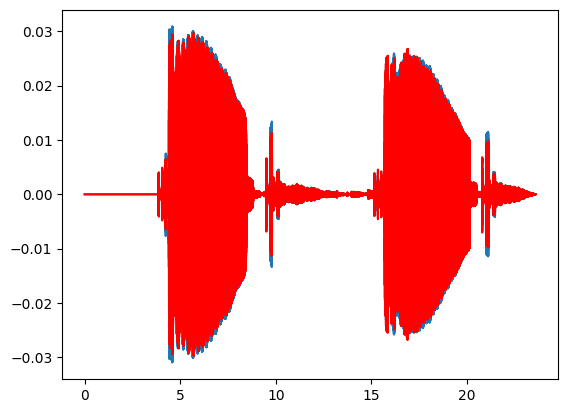

In [148]:


order = 3
low = 80.0
high= 1000.0
# b,a = cheby1(order, 10, [low, high], fs=fs, btype='band')
b,a = butter(order, [low, high], fs=fs, btype='band')
print(b, a)

filtered_sound = lfilter(b, a ,y)

onset_frames = librosa.onset.onset_detect(y)
onset_times = librosa.frames_to_time(onset_frames)
onset_samples = librosa.frames_to_samples(onset_frames)


print(y.shape)

print(len(onset_samples))

time_disc = np.linspace(0, len(filtered_sound)/ fs, num=len(filtered_sound))
plt.plot(time_disc,y)
plt.plot(time_disc, filtered_sound, color="red")
# y = filtered_sound
# for sample in onset_samples:
#     plt.axvline(x = sample/fs, color= 'red')

# for i in range(len(onset_samples)-5):
#     plt.figure(figsize=(10,6))
#     start = onset_samples[i]
#     end = onset_samples[i+1]
#     plt.plot(time_disc[start:end+1], y[start:end+1])
#     plt.axvline(x = start/fs, color= 'red')
#     plt.axvline(x = end/fs, color= 'red')

plt.show()

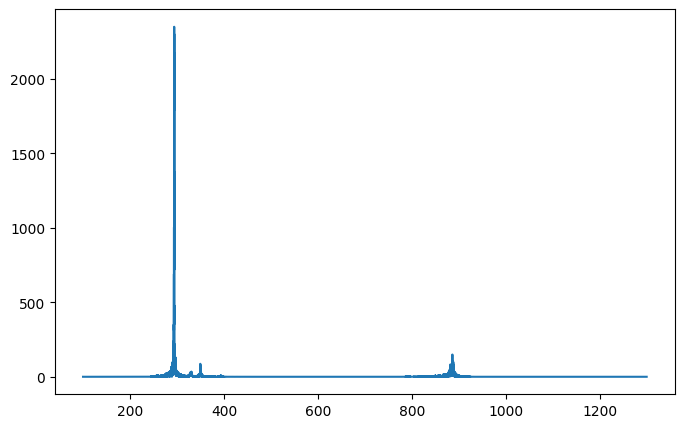

In [149]:
fft_frequencies = np.fft.rfftfreq(len(y), 1/fs)
sound_fft = np.fft.rfft(y)  

# maxim = np.max(np.abs(sound_fft))

plt.figure(figsize=(8,5))
plt.plot(np.where((fft_frequencies > 100) & (fft_frequencies < 1300), fft_frequencies, None) , np.abs(sound_fft))
# plt.plot(fft_frequencies , np.abs(sound_fft))




# plt.figure(figsize=(8,6))
# plt.plot(np.where((fft_frequencies > 100) & (fft_frequencies < 1000), fft_frequencies, None) , np.abs(sound_fft)/maxim)




In [150]:



with open("notes.txt", 'wt') as f:
    for onset_time in onset_times:
        f.write(f"{onset_time} \n")


notes = []



for i in range(len(onset_samples) -1):
    window = y[onset_samples[i]: onset_samples[i+1]]
    fft_frequencies = np.fft.rfftfreq(len(window), 1/fs)
    fft = np.fft.rfft(window)
    maxim = 0
    f = 0
    for j in range(len(fft)):
        amplitude = np.abs(fft[j])
        freq = fft_frequencies[j]
        if amplitude > maxim :
            maxim = amplitude
            f = freq
    # if librosa.hz_to_note(f) not in notes and f != 0:
    if f != 0:
        notes.append(librosa.hz_to_note(f)) 


final_window = y[onset_samples[-1]:]
fft_frequencies = np.fft.rfftfreq(len(final_window), 1/fs)
fft = np.fft.rfft(final_window)
maxim = 0
f = 0
for j in range(len(fft)):
    amplitude = np.abs(fft[j])
    freq = fft_frequencies[j]
    if amplitude > maxim:
        maxim = amplitude
        f = freq

if f!= 0:
    notes.append(librosa.hz_to_note(f)) 

print(notes)    


['A5', 'D4', 'F4', 'C4', 'E4', 'D4', 'D4', 'D4', 'D4', 'F4', 'A5', 'F4', 'D♯4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'D4', 'F4', 'D4', 'E4', 'D4', 'D4', 'D4', 'F4', 'A5', 'F4', 'F4']
